# Import images

In [27]:
import os
import shutil
import time

In [1]:
train_filenames = os.listdir('./train/train')
train_cat = filter(lambda x:x[:3] == 'cat', train_filenames)
train_dog = filter(lambda x:x[:3] == 'dog', train_filenames)

In [2]:
len(train_filenames)

25000

In [2]:
def rmrf_mkdir(dirname):
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)

In [3]:
# rmrf_mkdir('train2')
# os.mkdir('train2/cat')
# os.mkdir('train2/dog')

# rmrf_mkdir('test2')
# os.symlink('../test/', 'test2/test')

# for filename in train_cat:
#     os.symlink('../../train/'+filename, 'train2/cat/'+filename)

# for filename in train_dog:
#     os.symlink('../../train/'+filename, 'train2/dog/'+filename)

# Exploration

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [60]:
random.seed(13)

In [61]:
indices = random.sample(range(len(train_filenames)), 9)

In [62]:
indices 

[8487, 9527, 22454, 22415, 6085, 21365, 7554, 21829, 4822]

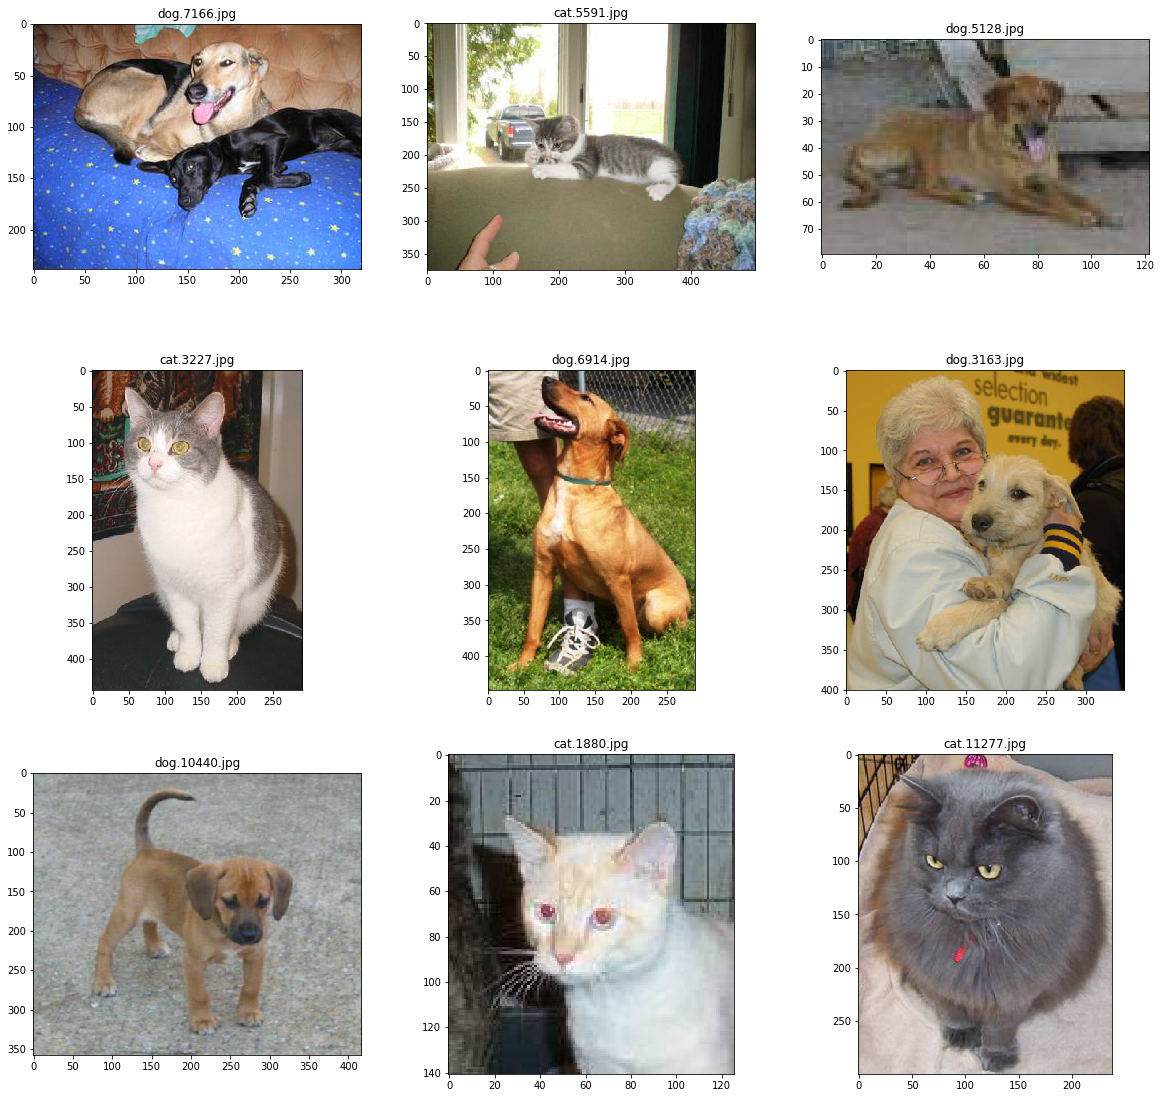

In [63]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(mpimg.imread('./train/train/%s'%train_filenames[indices[i]]))
    plt.title("%s"%train_filenames[indices[i]])

# Check 'outliers'

In [12]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [13]:
dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

cats=[
'n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052']

In [14]:
ResNet50_tp3 =[]

In [15]:
model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 1s 0us/step


In [16]:
import time

In [24]:
start_time =time.time()

In [25]:
# for i in range(len(train_filenames)):
for i in range(100):
    img = image.load_img('./train/train/%s'%train_filenames[i], target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    ResNet50_tp3.append(decode_predictions(preds, top=5)[0])
cost_time = time.time() - start_time

In [26]:
print("--- %s seconds ---" % (cost_time))

--- 3.158964157104492 seconds ---


In [ ]:
del model

In [ ]:
from keras.applications.resnet50 import Xception
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [6]:
model = ResNet50(weights='imagenet')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
import time

In [15]:
start_time =time.time()

In [ ]:
for i in range(len(train_filenames)):
    img = image.load_img('./train/train/%s'%train_filenames[i], target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    ResNet50_tp3.append(decode_predictions(preds, top=3)[0])
cost_time = time.time() - start_time

In [ ]:
del model

# train-validation

In [3]:
y= list(map(lambda x:1 if x[:3] == 'dog' else 0, train_filenames))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(train_filenames, y, test_size=0.33, random_state=20277)

In [35]:
# rmrf_mkdir('train_img')
# os.mkdir('train_img/cat')
# os.mkdir('train_img/dog')

# for filename in X_train:
#     if filename[:3] == 'cat':
#         os.symlink('../../train/'+filename, 'train_img/cat/'+filename)
#     else:
#         os.symlink('../../train/'+filename, 'train_img/dog/'+filename)

In [36]:
# rmrf_mkdir('val_img')
# os.mkdir('val_img/cat')
# os.mkdir('val_img/dog')


# for filename in X_val:
#     if filename[:3] == 'cat':
#         os.symlink('../../train/'+filename, 'val_img/cat/'+filename)
#     else:
#         os.symlink('../../train/'+filename, 'val_img/dog/'+filename)


# Fine-tune InceptionV3

In [7]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
image_size=(299,299)

In [10]:
gen = ImageDataGenerator()

In [41]:
train_generator = gen.flow_from_directory("./train_img", image_size, shuffle=False, 
                                          batch_size=16)

Found 16750 images belonging to 2 classes.


In [42]:
val_generator = gen.flow_from_directory("./val_img", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

Found 8250 images belonging to 2 classes.


In [21]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

In [22]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

In [23]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [24]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [25]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [43]:
start_time= time.time()

In [44]:
# train the model on the new data for a few epochs
model.fit_generator(train_generator, steps_per_epoch = len(X_train)/16, epochs=5, validation_data=val_generator, validation_steps=len(X_val)/16)

Epoch 1/5


StopIteration: [Errno 2] No such file or directory: './train_img/dog/dog.7469.jpg'

In [ ]:
cost_time = time.time() - start_time

In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(...)

## ypw

In [4]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import h5py

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
image_size=(299,299)
width = image_size[0]
height = image_size[1]
input_tensor = Input((height, width, 3))
x = input_tensor

In [5]:
if lambda_func:
    x = Lambda(lambda_func)(x)

NameError: name 'lambda_func' is not defined

In [8]:
base_model = InceptionV3(input_tensor=x, weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [10]:
model = InceptionV3(input_tensor = base_model.input, pooling= GlobalAveragePooling2D()(base_model.output))

96116736/96112376 [==============================] - 1s 0us/step


In [16]:
gen = ImageDataGenerator()
train_generator = gen.flow_from_directory("train2", image_size, shuffle=False, 
                                          batch_size=16)
test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [17]:
train = model.predict_generator(train_generator, train_generator.nb_sample)

AttributeError: 'DirectoryIterator' object has no attribute 'nb_sample'

In [ ]:
test = model.predict_generator(test_generator, test_generator.nb_sample)

In [ ]:
with h5py.File("gap_%s.h5"%MODEL.func_name) as h:
    h.create_dataset("train", data=train)
    h.create_dataset("test", data=test)
    h.create_dataset("label", data=train_generator.classes)

In [4]:


def write_gap(MODEL, image_size, lambda_func=None):
    width = image_size[0]
    height = image_size[1]
    input_tensor = Input((height, width, 3))
    x = input_tensor
    if lambda_func:
        x = Lambda(lambda_func)(x)

    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))

    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("train2", image_size, shuffle=False, 
                                              batch_size=16)
    test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                             batch_size=16, class_mode=None)

    train = model.predict_generator(train_generator, train_generator.nb_sample)
    test = model.predict_generator(test_generator, test_generator.nb_sample)
    with h5py.File("gap_%s.h5"%MODEL.func_name) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)

write_gap(ResNet50, (224, 224))
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)
write_gap(Xception, (299, 299), xception.preprocess_input)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/keras/engine/training.py", line 429, in data_generator_task
    generator_output = next(self._generator)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/keras/preprocessing/image.py", line 662, in __next__
    return self.next(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/keras/preprocessing/image.py", line 832, in next
    target_size=self.target_size)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/keras/preprocessing/image.py", line 296, in load_img
    img = pil_image.open(path)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/PIL/Image.py", line 2543, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2

TypeError: Error when checking : data should be a Numpy array, or list/dict of Numpy arrays. Found: None...